# Introduction

In this week of the course, we will be using [BERT](https://arxiv.org/abs/1810.04805) (Bidirectional Encoder Representations from Transformers) model to build a medical Q/A system - Bot that answer your Medical queries which is based on Encoder architecture.

<center>
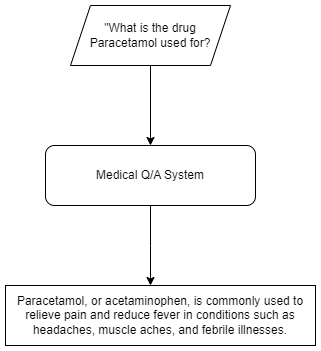
<P>Figure 1: Example of a Medical Q/A system</P>
</center>

## Prerequisites

Before starting to read the following notebook on Medical QA system, have a clear understanding of the following terminologies:
1. [Preprocessing data for NLP task](https://medium.com/@maleeshadesilva21/preprocessing-steps-for-natural-language-processing-nlp-a-beginners-guide-d6d9bf7689c9).
2. [Word Representation/Vectorization](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks#word-representation) - One-hot, BoW, TF-IDF, Word2Vec, GloVe, ELMo, BERT.
3. [NLP Model Building blocks](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks#overview) - RNN, LSTM, and GRU.
4. [Attention Mechanism and Transformer Block](https://towardsdatascience.com/all-you-need-to-know-about-attention-and-transformers-in-depth-understanding-part-1-552f0b41d021)

## What is Question Answering?

"Question answering tasks return an answer given a question. If you’ve ever asked a virtual assistant like Alexa, Siri or Google what the weather is, then you’ve used a question answering model before. There are two common types of question answering tasks:

Extractive: extract the answer from the given context.
Abstractive: generate an answer from the context that correctly answers the question." - [Hugging Face](https://huggingface.co/docs/transformers/tasks/question_answering)

_We will endeavor to create an "Abstractive" QA system in this week of the course._

## Medical Q/A - How to build such a system?

Below is the brief description of steps to build an abstractive QA system:

1. First, we would be getting the QA Dataset for the BERT model.

    The dataset would be in the format of:
    ```
    Question (Q): What is the drug forxiga used for?
    Passage that contains the answer (P) or Context: Paracetamol (Panadol, Calpol, Alvedon) is an analgesic and antipyretic drug that is used to _ temporarily relieve mild-to-moderate pain and fever _. It is commonly included as an ingredient in cold and flu medications and is also used on its own.
    Answer (A): temporarily relieve mid-to-moderate pain and fever
    ```

    Here, Passage (P) contains the Answer (A), enclosed by "_".

2. Next would be to preprocess the raw dataset into feedable form (Tokens). So, we break the input (Q & P) into Tokens/Words. Then, we feed it to the model, here BERT. The model converts each of the words/tokens into vector representation of 768 dimension AKA _Contextualized Word Representations_.

    <center><img src="../../assets/W2/W2_P1_QA_bot_step2.png" width=900></img></center>

    Here, Q and P are separated using a special `[sep]` Token, with start and end tokens to notify the start and end of the data sample.

    <center><img src="../../assets/W2/W2_P1_QA_bot_step2_1.png" width=900></img></center>

    Note: Similar words have smaller distance while different are larger. We can visualize this using dimensionality reduction techniques, such as [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

3. Since the answer (A) is available within the provided Passage (P), we can, for each of the word of P (i.e. after the `[sep]` token), using BERT classify it as Start or End of the passage.

    <center><img src="../../assets/W2/W2_P1_start_end_classification_1.png" width=900></img></center>

    Note: To compute the Start and End Score ($xS$ and $xE$, resp) for each of the word, we multiply the Contextualized word representation with vectors $S$ and $E$. Note: The model needs to learn these vectors using the training data provided by user in iterative fashion. Consequently, the word representation are also updated.

    After learning these vectors, we can compute the $xS$ and $xE$ scores for each of the word. And the higher the values of $xS$ and $xE$, the more likely that the word is Start or End of the Answer (A). 

    <center><img src="../../assets/W2/W2_P1_start_end_classification_2.png" width=900></img></center>

4. Finally, for finding the most probable answer, we compute a grid of score, where each score is a sum of start and end scores. The highest score is the most probable answer. Note: _By computing only the top diagonal of the grid we can remove the scores where end comes before the start._ 

    <center><img src="../../assets/W2/W2_P1_start_end_classification_3.png" width=900></img></center>







### Additional information on Handling Words with Multiple meaning (Homonyms)

> The __force__ is strong with this one.

> Did you __force__ him into taking this class?

Here, the word __force__ have different meanings. So, _how do we provide context to the model about the meanings of the words?_ 

Previously, __Word2Vec__ and __GLove__ were used for encoding the word to vector, but didn't have the context embedded in them. So, they are termed "Non-Contextualized Word Representations". Now, For BERT model we used __"Contextualized Word Representations"__ - ELMo (Embeddings for Language Models), BERT representation.

The steps to learn the contextualized representation of words is as follows:

For a masked token prediction task:
1. Word from passage of text in input into the BERT model as tokens.

    <center><img src="../../assets/W2/W2_P1_contextualizaed_word_representations_1.png" width=900></img></center>

2. Next, one of the word is masked using a `[MASK]` token and fed to BERT for prediction of the word: A layer is added to the output of bert to provide prediction probabilities of the model.

    <center><img src="../../assets/W2/W2_P1_contextualizaed_word_representations_2.png" width=900></img></center>

3. As a consequence, in the processing of learning such a task, the BERT model learns the word representation (vectors) of n-dimensions.

    <center><img src="../../assets/W2/W2_P1_contextualizaed_word_representations_3.png" width=900></img></center>

### Additional info on BioBERT and Dataset for computing score vectors.

BERT has been trained on Passages from PubMed Abstracts (4.5B) and PMC Full-Text to obtain the Contextualized Work Representations for words frequently used in medicine. This model is known as BioBERT.

Also for Natural language questions from general domain, say, SQuAD, is utilized for priliminary training and obtaining score vectors in BERT model. Later the model is fine-tuned in biomedical datasets, such as BioASQ.

## Conclusion

In this notebook we discussed on the steps for training a BERT model for medical Question answering system. In addition, we discussed about contextualized word representations.

## References

1. "Preprocessing Steps for Natural Language Processing (NLP): A Beginner’s Guide" by Meleesha De Silva on Medium.
2. "CS 230 - Deep Learning: RNN CheatSheet" By Afshine Amidi and Shervine Amidi.
3. "All you need to know about 'Attention' and 'Transformers'" - In-depth Understanding - Part 1